Выполнила Баштаник Дарья

In [58]:
from PIL import Image
import numpy as np

In [59]:
def swd_optimisation(x, c):
    U, S, V = np.linalg.svd(x, full_matrices=False) # разложение SVD
    for i in range(c, len(S)): # зануляем ненужные сингулярные значения
        S[i] = 0.0
    S = np.diag(S) # делаем диагональную матрицу
    Y_r = U @ S @ V # "Собираем" матрицу обратно
    Y_r[Y_r > 255] = 255
    Y_r[Y_r < 0] = 0
    return Y_r

In [60]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8, 9], [10, 11, 12]])
C = np.array([[13, 14, 15], [16, 17, 18]])
res = np.concatenate((A[:, :,None], B[:, :,None], C[:, :,None]), axis=2)
res

array([[[ 1,  7, 13],
        [ 2,  8, 14],
        [ 3,  9, 15]],

       [[ 4, 10, 16],
        [ 5, 11, 17],
        [ 6, 12, 18]]])

In [61]:
img = Image.open('bobr.jpg') # можно сделать .resize(())
X = np.array(img, dtype=np.float32) # преобразование из PIL в numpy array
r = 0
for sing_val in (1, 3, 10, 30, 100): # проходитмся ко количествам сингулярных значений
    r += 1
    Y_r = np.concatenate((swd_optimisation(X[:,:,0], sing_val)[:, :,None], swd_optimisation(X[:,:,1], sing_val)[:, :,None], swd_optimisation(X[:,:,2], sing_val)[:, :,None]), axis=2)
    Image.fromarray(np.asarray(Y_r, dtype=np.uint8)).save(f'bobr_number-{r}.png') # сохранем картинку

Размер файла при количестве сингулярных значений: 1 - 611579
Получившаяся кортинка: 


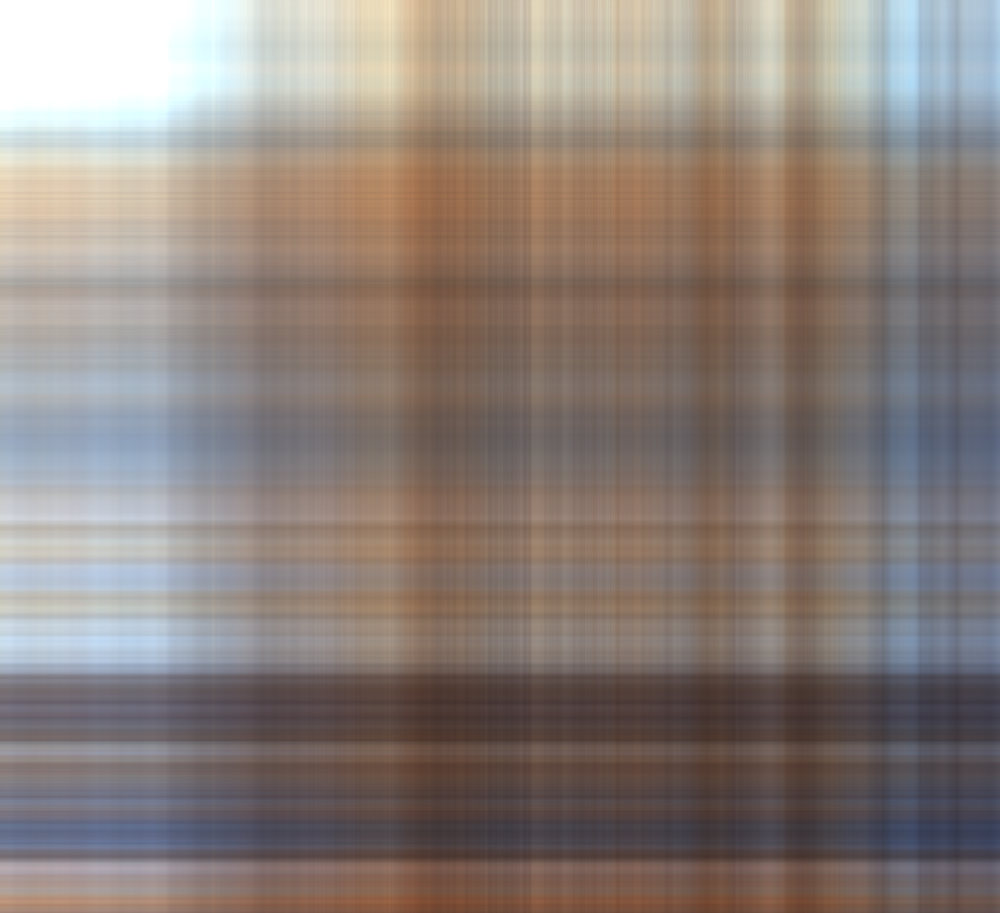

Размер файла при количестве сингулярных значений: 3 - 806750
Получившаяся кортинка: 


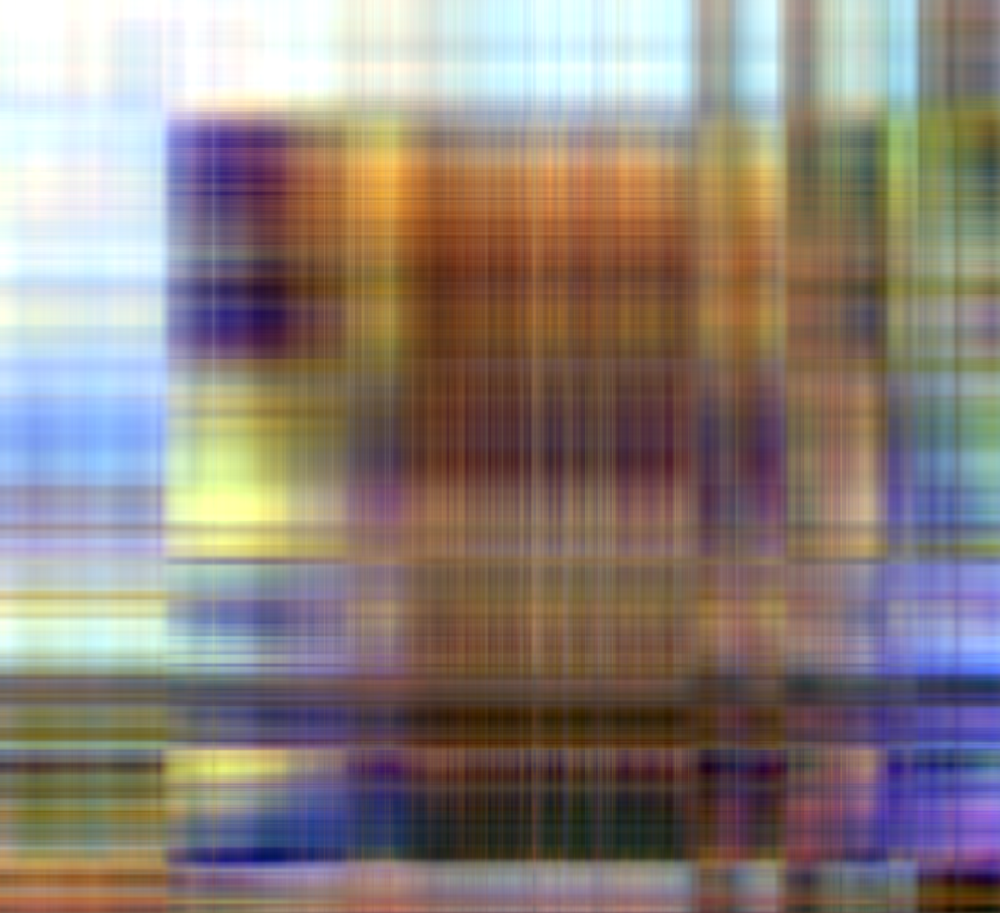

Размер файла при количестве сингулярных значений: 10 - 1045574
Получившаяся кортинка: 


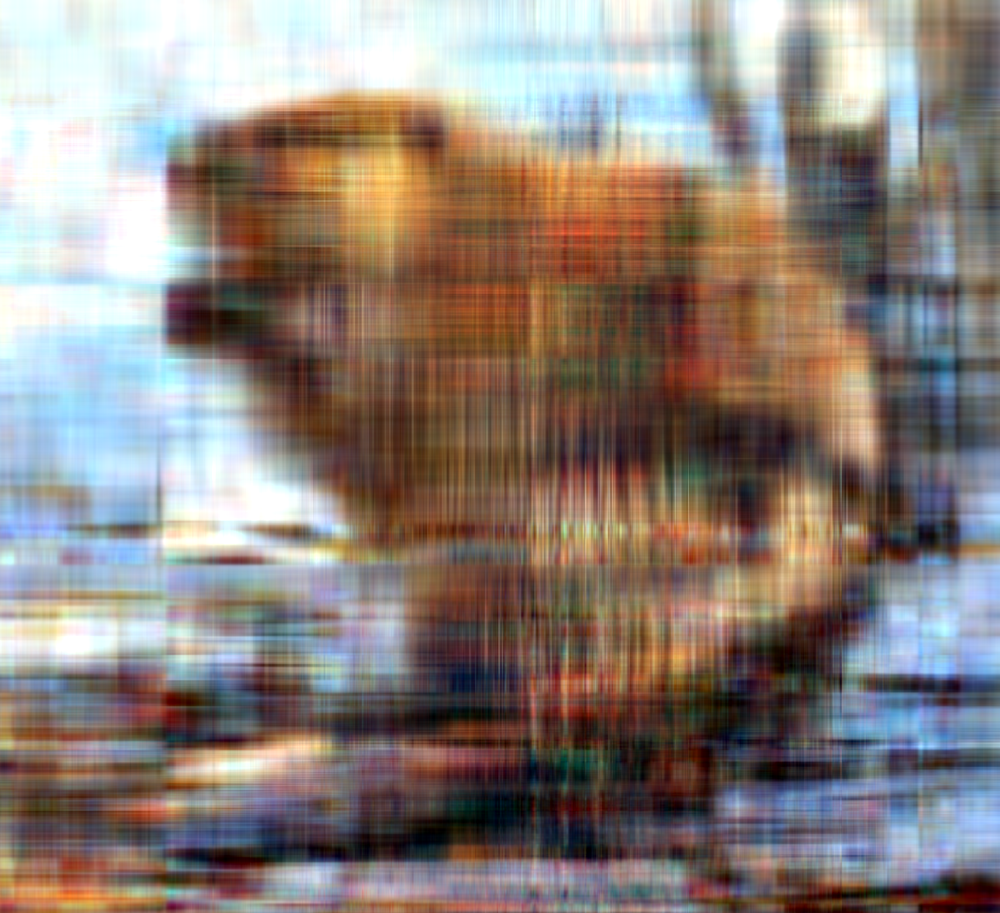

Размер файла при количестве сингулярных значений: 30 - 1330262
Получившаяся кортинка: 


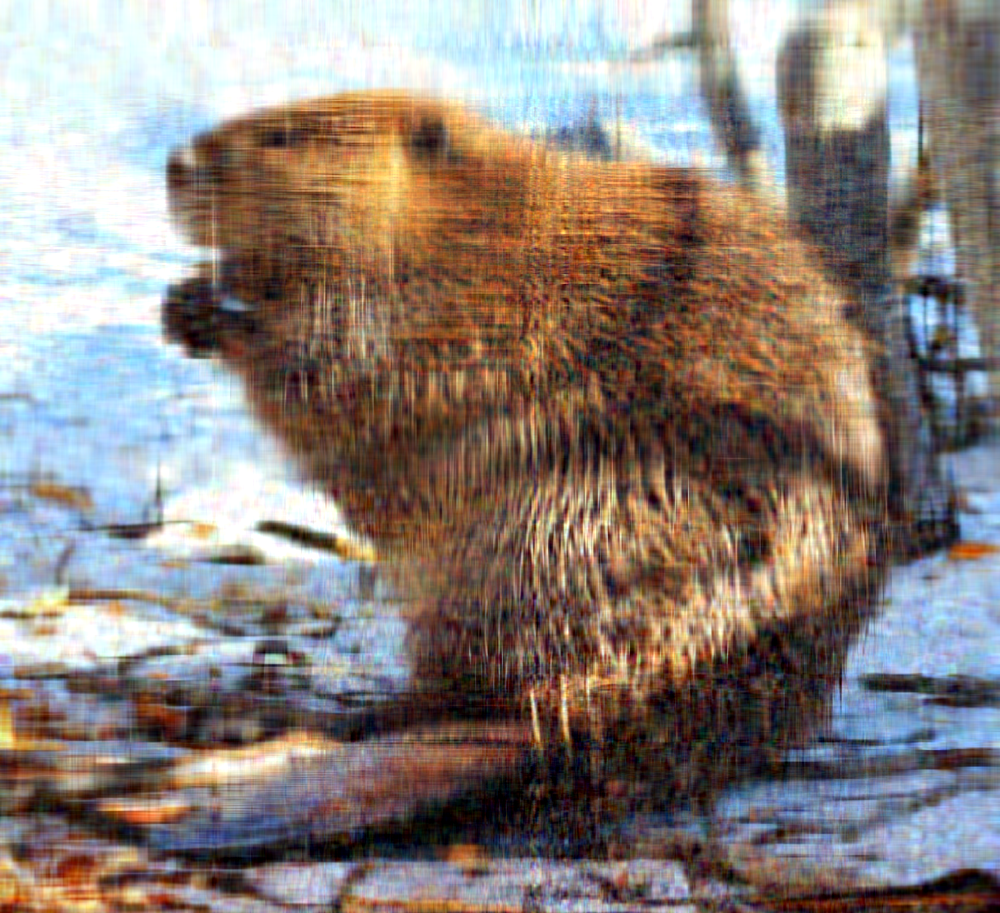

Размер файла при количестве сингулярных значений: 100 - 1698490
Получившаяся кортинка: 


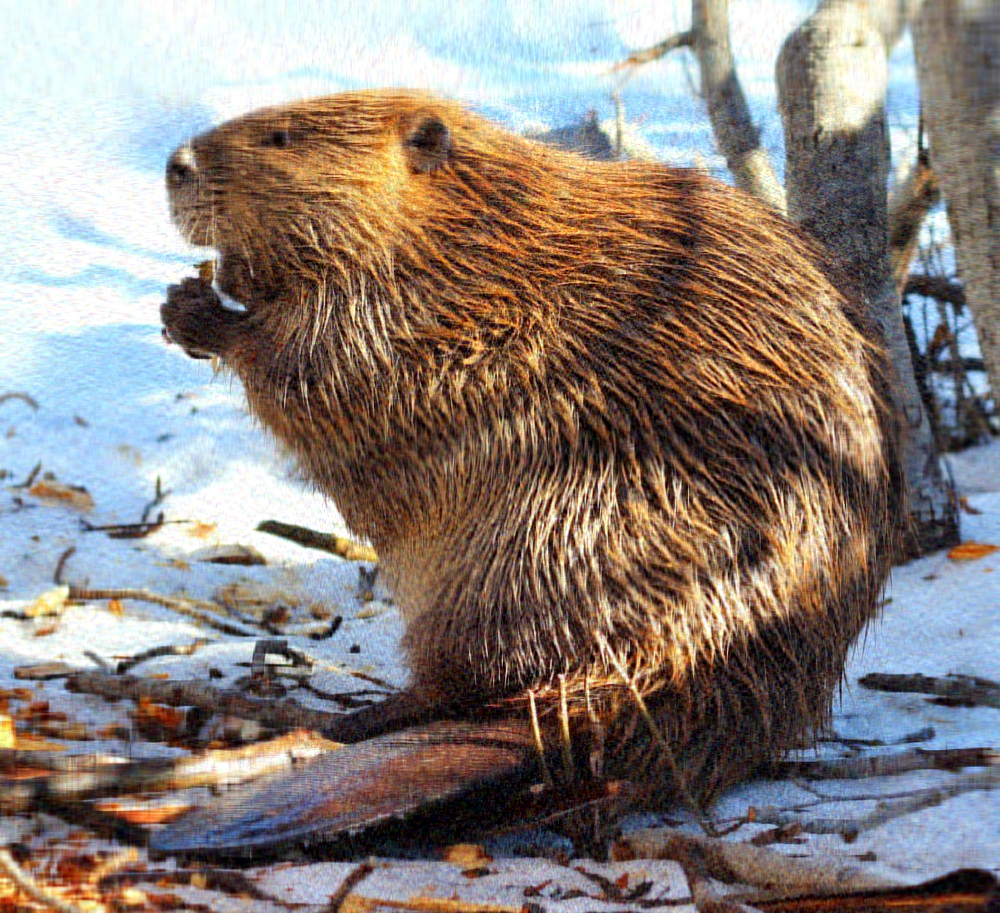

In [62]:
# посмотрим размеры полученных файлов с помощью библиотеки os
import os
from IPython.display import Image
sing_val = (1, 3, 10, 30, 100)
for i in range(1, 6):
    print(f'Размер файла при количестве сингулярных значений: {sing_val[i-1]} - {os.path.getsize(f"bobr_number-{i}.png")}')
    print("Получившаяся кортинка: ")
    img = Image(filename=f"bobr_number-{i}.png") 
    display(img)